# 2020 Stack Overlow Survey Analysis

This analysis focuses on the demographics of the LGBTQ+ IT Professional Developer community.  This project applies the CRISP-DM Methodology on the 2020 Stack Overlow Survey Results and will answer three questions:

"What percentage of IT Professional Developers are LGBTQ+ vs Straight/Heterosexual?"

"What are the Top 10 countries for LGBTQ+ IT Developers based on survey population?"

"What is the mean salary difference between LGBTQ+ and Straight/Heterosexual IT Developers across the top 10 countries?"

### Business Understanding

The Stack Overflow's annual Developer Survey is the largest survey for IT Developers around the world - in 2020, close to 65k people participated across 213 countries. This survey also captures the diversity of Developers worldwide.

Using the 2020 Stack Overflow survey results and applying data science methodologies, this study will provide insight into the current demographics of the LGBTQ+ IT Developer community

### Data Understanding


In [2]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
from collections import defaultdict
import warnings
import dataframe_image as dfi # save data frame images
#from sklearn.preprocessing import Imputer
warnings.filterwarnings('ignore')

%matplotlib inline

# Read 2020 Survey Results
df_2020 = pd.read_csv('./survey_results_public_2020.csv')


In [3]:
# Get Number of Rows & Columns
print('The 2020 Stack Overflow Survey has {0} rows and {1} columns'.format(df_2020.shape[0],df_2020.shape[1]))
# Display Column Names
print('Columns:', df_2020.columns)

The 2020 Stack Overflow Survey has 64461 rows and 61 columns
Columns: Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyL

In [4]:
df_2020.drop(['Respondent'], axis = 1).describe()

,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,30.834111,3.190464e+242,1.037561e+05,40.782174
std,9.585392,inf,2.268853e+05,17.816383
min,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,35.000000,1.250000e+05,9.500000e+04,44.000000
max,279.000000,1.111111e+247,2.000000e+06,475.000000


In [5]:
#Get unique values - Sexuality column will be used to compute new LGBTQ+ column 
df_2020['Sexuality'].value_counts()

Straight / Heterosexual                                  40118
Bisexual                                                  1918
Gay or Lesbian                                             978
Bisexual;Straight / Heterosexual                           258
Queer                                                      249
Bisexual;Queer                                             191
Gay or Lesbian;Queer                                        90
Straight / Heterosexual;Queer                               56
Bisexual;Gay or Lesbian                                     40
Bisexual;Gay or Lesbian;Straight / Heterosexual;Queer       39
Bisexual;Gay or Lesbian;Queer                               24
Gay or Lesbian;Straight / Heterosexual                      13
Bisexual;Straight / Heterosexual;Queer                      10
Bisexual;Gay or Lesbian;Straight / Heterosexual              8
Name: Sexuality, dtype: int64

In [6]:
#Get unique values for ConvertedComp - This column will be used to compute mean salary - "Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks."
df_2020['ConvertedComp'].value_counts()

120000.0     341
100000.0     306
150000.0     277
1000000.0    258
2000000.0    258
            ... 
230916.0       1
1135.0         1
348.0          1
132.0          1
44023.0        1
Name: ConvertedComp, Length: 6958, dtype: int64

In [7]:
#Get unique values - This column will be used to filter on Professional Developers
df_2020['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

### Data Preparation

In [8]:
# Create new dataframe to capture only Professional Developers

# sort dataframe 
df_2020.sort_values("MainBranch", inplace = True) 
  
# create new dataframe
df_professional = df_2020[(df_2020['MainBranch'] == 'I am a developer by profession')] 

print('Professional Developers:  {0}'.format(df_professional.shape[0]))
print('All Respondents:  {0}'.format(df_2020.shape[0]))

Professional Developers:  47193
All Respondents:  64461


In [9]:
#Drop the row if Sexuality is missing values, List updated values and counts

df_professional  = df_professional.dropna(subset=['Sexuality'], axis=0)

sexuality= df_professional.groupby('Sexuality')['Sexuality'].count().sort_values(ascending=False)/len(df_2020)
sexuality_count = df_professional.groupby('Sexuality')['Sexuality'].count().sort_values(ascending=False)
print('Total Count of Professional Developers that have a value in the Sexuality Column:  {0}'.format(df_professional.shape[0]))

print(sexuality_count)

Total Count of Professional Developers that have a value in the Sexuality Column:  33220
Sexuality
Straight / Heterosexual                                  30520
Bisexual                                                  1312
Gay or Lesbian                                             710
Bisexual;Straight / Heterosexual                           177
Queer                                                      169
Bisexual;Queer                                             145
Gay or Lesbian;Queer                                        64
Straight / Heterosexual;Queer                               44
Bisexual;Gay or Lesbian;Straight / Heterosexual;Queer       23
Bisexual;Gay or Lesbian                                     21
Bisexual;Gay or Lesbian;Queer                               16
Bisexual;Straight / Heterosexual;Queer                       7
Gay or Lesbian;Straight / Heterosexual                       7
Bisexual;Gay or Lesbian;Straight / Heterosexual              5
Name: Sexuality, dt

In [10]:
# Create new column called LGBTQ, populate with either LGBTQ+ or Straight / Heterosexual based on Sexuality value
filter = ['Straight / Heterosexual']
df_professional['LGBTQ'] = df_professional.Sexuality.apply(lambda x : 'Straight / Heterosexual' if x in filter else 'LGBTQ')
#Validate Results
df_professional.LGBTQ.unique()


array(['Straight / Heterosexual', 'LGBTQ'], dtype=object)

## Evaluation


### Question 1: "What percentage of IT Professional Developers are LGBTQ+ vs Straight/Heterosexual?"

In [11]:
# Validate new column
print("Professional Developers - LGBTQ+ : {:.2%}".format(df_professional.groupby('LGBTQ').LGBTQ.count()['LGBTQ']/len(df_professional)))
print("Professional Developers - Straight / Heterosexual: {:.2%}".format(df_professional.groupby('LGBTQ').LGBTQ.count()['Straight / Heterosexual']/len(df_professional)))

#Create a pandas series of the counts for each LGBTQ status
LGBTQ_vals = df_professional.LGBTQ.value_counts() 
print('Counts')
print(LGBTQ_vals)


Professional Developers - LGBTQ+ : 8.13%
Professional Developers - Straight / Heterosexual: 91.87%
Counts
Straight / Heterosexual    30520
LGBTQ                       2700
Name: LGBTQ, dtype: int64


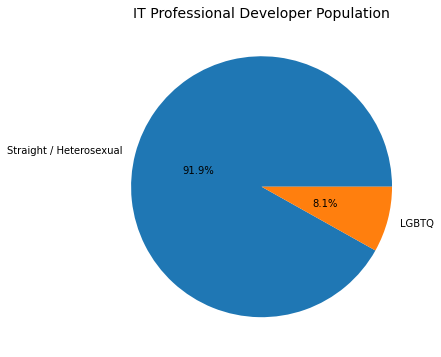

In [12]:
# Create Pie Chart 
pie, ax = plt.subplots(figsize=[10,6])
labels = LGBTQ_vals.keys()
plt.pie(x=LGBTQ_vals, explode=None, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("IT Professional Developer Population", fontsize=14);
pie.savefig("question1.png")


##### Answer:  8.1% are LGBTQ+ and 91.9% are Straight/Heterosexual

### Question 2: "What are the Top 10 countries for LGBTQ+ IT Developers based on survey population?"

In [14]:
#Create two new dataframes one for LGBTQ population & one for Straight / Heterosexuals
df_LGBTQ = df_professional[df_professional.LGBTQ.apply(lambda x: True if 'LGBTQ' in x else False)]
df_nonLGBTQ = df_professional[df_professional.LGBTQ.apply(lambda x: True if 'Straight / Heterosexual' in x else False)]
 
# Get LGBTQ Counts by ALL Countries sort descending values    
country = df_LGBTQ.groupby('Country')['Country'].count().sort_values(ascending=False)

# Get List of ALL Country and counts
country_list = zip(list(country.index),  list(country))

# Print ALL Country & Counts
for country in country_list:
    
    print(country[0] + ": " ,country[1])
    

United States:  850
United Kingdom:  259
Germany:  193
India:  141
Canada:  124
Brazil:  113
France:  83
Australia:  73
Netherlands:  60
Spain:  56
Russian Federation:  44
Sweden:  42
Poland:  35
Iran:  28
Italy:  25
Belgium:  23
South Africa:  23
Argentina:  22
Turkey:  21
Austria:  19
Pakistan:  19
Denmark:  19
Israel:  18
Finland:  17
Switzerland:  16
Czech Republic:  16
Portugal:  16
Mexico:  16
Norway:  14
Ireland:  14
Romania:  14
New Zealand:  14
Ukraine:  13
Philippines:  13
Japan:  12
China:  12
Bangladesh:  12
Colombia:  11
Hungary:  11
Nigeria:  9
Serbia:  8
Sri Lanka:  8
South Korea:  8
Uruguay:  7
Singapore:  6
Belarus:  6
Indonesia:  6
Egypt:  6
Lithuania:  6
Taiwan:  5
Latvia:  5
Malaysia:  5
Croatia:  5
Iceland:  5
Viet Nam:  5
Estonia:  4
Kenya:  4
Chile:  4
Bulgaria:  4
Peru:  4
Afghanistan:  4
Slovakia:  3
Thailand:  3
Slovenia:  3
Kyrgyzstan:  3
Morocco:  3
Costa Rica:  3
Dominican Republic:  3
Ghana:  3
Nicaragua:  2
Kazakhstan:  2
Cambodia:  2
United Arab Emirates

There are 98 distinct Countries.


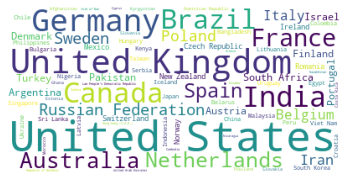

In [15]:
# Create wordcloud visualization based on the frequency of Country counts for the LGBTQ+ population
from wordcloud import WordCloud

text = " ".join(df_LGBTQ['Country'])
word_ls = df_LGBTQ['Country']

# create dictionary of words
word_could_dict = Counter(word_ls)
print ("There are {} distinct Countries." .format(len(word_could_dict)))

# Display image, using word frequencies 
wordcloud = WordCloud(background_color="white",max_font_size=60, relative_scaling=.3).generate_from_frequencies(word_could_dict)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud.png")

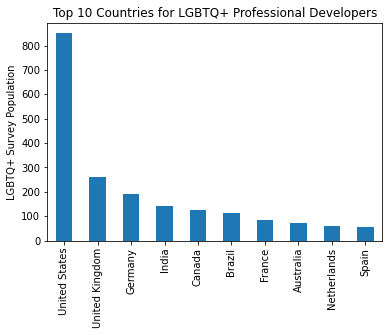

In [16]:
#Provide a pandas series of the counts for each Country getting only top 10 for LGBTQ+ professional Developers
country_vals = df_LGBTQ.Country.value_counts()[:10]

#Create Chart
(country_vals).plot(kind="bar" );
plt.title("Top 10 Countries for LGBTQ+ Professional Developers");
plt.ylabel('LGBTQ+ Survey Population')
plt.savefig("question2.png", bbox_inches='tight')

#### Answer:  Top Ten Countries for LGBTQ+ Professional Developers
United States,
United Kingdom,
Germany,
India,
Canada,
Brazil,
France,
Australia,
Netherlands,
Spain

### Question 3:  "What is the mean salary difference between LGBTQ+ and Straight/Heterosexual IT Developers across the top 10 countries?"


In [17]:
# Create country filter based on Top 10 Countries for LGBTQ+
country_filter = ['United States','United Kingdom','Germany','India','Canada','Brazil','France','Australia','Netherlands','Spain']

#Remove rows that have no salary 
df_LGBTQ  = df_LGBTQ.dropna(subset=['ConvertedComp'], axis=0)
df_nonLGBTQ  = df_nonLGBTQ.dropna(subset=['ConvertedComp'], axis=0)

## Focus the remaining analysis on the top 10 countries for consistency in our analysis
df_LGBTQ = df_LGBTQ[(df_LGBTQ['Country'].apply(lambda x : x in country_filter))]
df_nonLGBTQ = df_nonLGBTQ[(df_nonLGBTQ['Country'].apply(lambda x : x in country_filter))]


In [18]:
#Create panda series for the mean Salary of each Country by sexual orientation grouping

lgbtq_mean_pay = df_LGBTQ.groupby('Country').ConvertedComp.mean().sort_index()

nonlgbtq_mean_pay = df_nonLGBTQ.groupby('Country').ConvertedComp.mean().sort_index() 

#Validate Results
print('LQBTQ+:')
print(lgbtq_mean_pay)

print('Straight / Heterosexual:')      
print(nonlgbtq_mean_pay)

LQBTQ+:
Country
Australia         134498.288136
Brazil             18377.315789
Canada             92783.289720
France             63875.444444
Germany            84041.142857
India              43972.617284
Netherlands        97597.666667
Spain              51349.227273
United Kingdom    125519.060606
United States     175631.688679
Name: ConvertedComp, dtype: float64
Straight / Heterosexual:
Country
Australia         146014.494485
Brazil             25010.318616
Canada            116803.633612
France             75528.122829
Germany            90684.923501
India              26325.601307
Netherlands        77538.509868
Spain              73321.388788
United Kingdom    142669.988423
United States     209702.725573
Name: ConvertedComp, dtype: float64


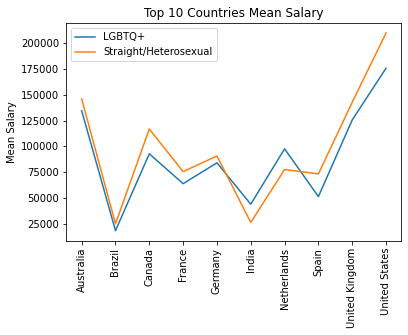

In [19]:
#Create Line Chart
plt.ylabel('Mean Salary')

plt.xticks(rotation=90)

plt.plot(list(lgbtq_mean_pay.index), list(lgbtq_mean_pay), label = 'LGBTQ+')

plt.plot(list(nonlgbtq_mean_pay.index), list(nonlgbtq_mean_pay), label = 'Straight/Heterosexual')

plt.legend(loc='upper left', prop={'size':10})

plt.title("Top 10 Countries Mean Salary");

plt.savefig("question3.png", bbox_inches='tight')

In [20]:
#Capture the Percentage Difference of Mean Salary by Country
comp_df = pd.merge( nonlgbtq_mean_pay,lgbtq_mean_pay, left_index=True, right_index=True)
comp_df.columns = ['Straight/Heterosexual_Mean_Salary', 'LGBTQ+_Mean_Salary']
comp_df['Mean_Salary_Difference'] = comp_df['LGBTQ+_Mean_Salary'] - comp_df['Straight/Heterosexual_Mean_Salary']
comp_df['Salary_Percent_Difference'] = ((comp_df['LGBTQ+_Mean_Salary'] - comp_df['Straight/Heterosexual_Mean_Salary'])/comp_df['LGBTQ+_Mean_Salary']) * 100

comp_df = comp_df.sort_values(by='Salary_Percent_Difference', ascending=True)
comp_df.style.bar(subset=['Salary_Percent_Difference'], align='mid', color=['#d65f5f', '#5fba7d'])



,Straight/Heterosexual_Mean_Salary,LGBTQ+_Mean_Salary,Mean_Salary_Difference,Salary_Percent_Difference
Country,,,,
Spain,73321.388788,51349.227273,-21972.161516,-42.789663
Brazil,25010.318616,18377.315789,-6633.002826,-36.093426
Canada,116803.633612,92783.289720,-24020.343892,-25.888653
United States,209702.725573,175631.688679,-34071.036894,-19.399140
France,75528.122829,63875.444444,-11652.678384,-18.242814
United Kingdom,142669.988423,125519.060606,-17150.927817,-13.664003
Australia,146014.494485,134498.288136,-11516.206350,-8.562344
Germany,90684.923501,84041.142857,-6643.780643,-7.905391
Netherlands,77538.509868,97597.666667,20059.156798,20.552906


In [21]:
#Save this image
df_styled = comp_df.style.bar(subset=['Salary_Percent_Difference'], align='mid', color=['#d65f5f', '#5fba7d'])
dfi.export(df_styled, 'salary_diff.png')

 #### Answer: "What is the mean salary difference between LGBTQ+ and Straight/Heterosexual IT Developers across the Top 10 countries?"
Really interesting results …The majority of these countries had significant negative differences - Spain having the largest disparity with a -42 % difference in mean salary between the LGBTQ+ and Straight/Heterosexual survey population. The United States had a -19% difference in mean salary. On the plus side, there were actually two countries that the LGBTQ+ survey population mean salary exceeded the Straight/Heterosexual survey population. India had a 40% increase in mean salary followed by the Netherlands with a 20.5% increase in mean salary over the Straight/Heterosexuals survey population. This definitely brings up a lot questions and opens the door for further LGBTQ+ employment equality analysis.